# Resampling Datetime Data(Core)
- *David Atkins*

### Loading & Prepping Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates

url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [21]:
# Converting date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
# Setting Index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [22]:
# Filtering out only required data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [23]:
# Imputing missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [24]:
# Filling Precipitation/Snow_Depth w/ 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [25]:
## interpolating the rest
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [26]:
# Checking
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

### Answering Questions with Visualizations

##### Q1: What month had the most precipitation between 2000 through 2010?

In [60]:
ts = df['precipitation'].copy()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [128]:
q1_ts = ts.resample("M").sum()
q1_ts.name = 'Precipitation'
q1_ts.head()

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
Freq: M, Name: Precipitation, dtype: float64

In [129]:
q1_date_range = pd.date_range(start='1/2000', end='12/2010', freq='M')
q1_date_range

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31',
               '2010-06-30', '2010-07-31', '2010-08-31', '2010-09-30',
               '2010-10-31', '2010-11-30'],
              dtype='datetime64[ns]', length=131, freq='M')

In [130]:
q1_ts = q1_ts.loc[q1_date_range]
q1_ts

2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-07-31    18.0
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
Freq: M, Name: Precipitation, Length: 131, dtype: float64

In [143]:
q1_date_max_precip = q1_ts.idxmax()
q1_max_precip = q1_ts.max()
peak = f"{q1_max_precip} Inches in {q1_date_max_precip.strftime('%B %Y')}"
peak

'138.4 Inches in November 2009'

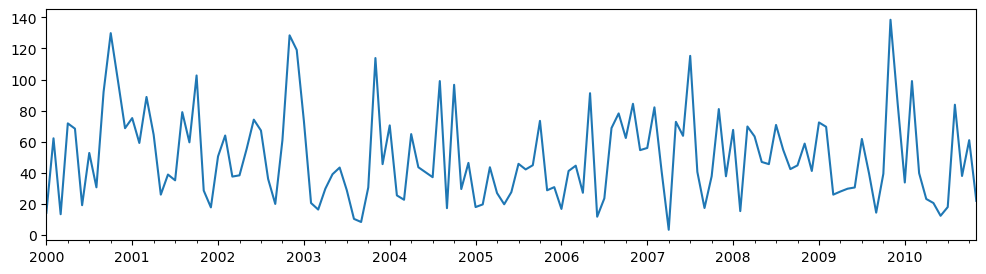

In [147]:
q1_ts.plot(figsize=(12,3));

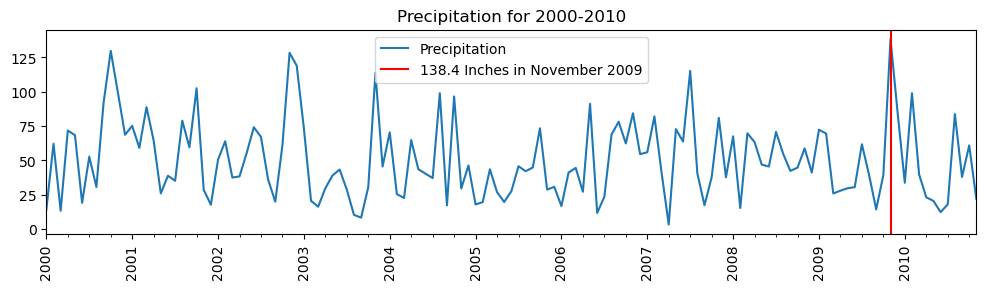

In [148]:
fig, ax = plt.subplots(figsize=(12,3))
q1_ts.plot(ax=ax,title="Precipitation for 2000-2010")
ax.set_ylabel=("Inches")
ax.axvline(q1_date_max_precip,color='red',label=peak)
fig.autofmt_xdate(which='major',rotation=90,ha='center')
plt.legend();


##### Q2: Which year between 2000-2020 had the coolest average temperature?

In [154]:
ts2 = df['mean_temp'].copy()
ts2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [175]:
q2_ts = ts2.resample("A").mean()
q2_ts.name = 'Mean Temperature'
q2_ts.head()

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
Freq: A-DEC, Name: Mean Temperature, dtype: float64

In [156]:
q2_date_range = pd.date_range(start='1/2000', end='12/2020', freq='A')
q2_date_range

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [157]:
q2_ts = q2_ts.loc[q2_date_range]
q2_ts

2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
2005-12-31    11.822877
2006-12-31    12.290822
2007-12-31    11.944384
2008-12-31    11.326776
2009-12-31    11.721644
2010-12-31    10.657397
2011-12-31    12.366438
2012-12-31    11.300956
2013-12-31    11.166301
2014-12-31    12.658904
2015-12-31    12.123699
2016-12-31    11.906284
2017-12-31    12.242466
2018-12-31    12.501370
2019-12-31    12.206164
Freq: A-DEC, Name: Avg. Temp, dtype: float64

In [179]:
q2_min_temp_date = q2_ts.idxmin()
q2_min_temp = q2_ts.min()
lowest = f"{q2_min_temp_date.strftime('%Y')} lowest mean temperature: {q2_min_temp:.2f} degrees."
lowest

'2010 lowest mean temperature: 10.66 degrees.'

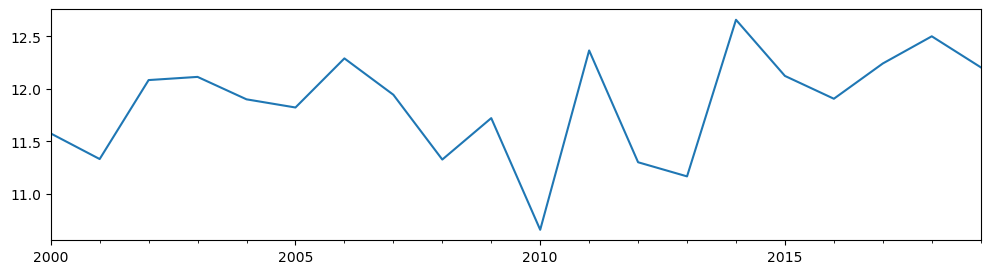

In [168]:
#Bugfix
q2_ts.plot(figsize=(12,3));

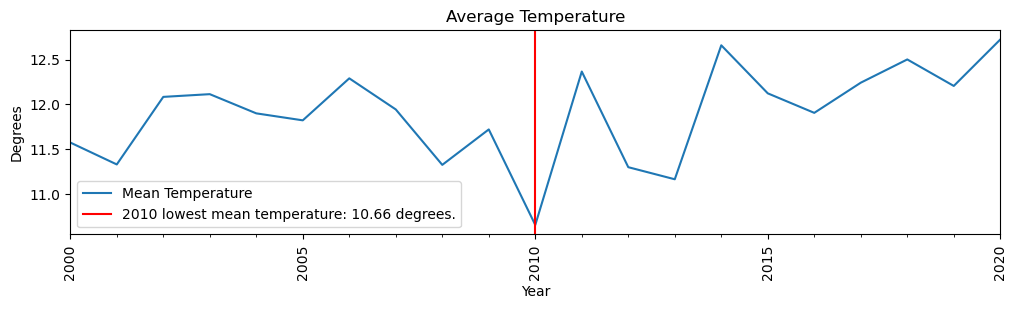

In [189]:
fig, ax = plt.subplots(figsize=(12,3))
q2_ts.plot(ax=ax,title="Average Temperature")
ax.set(ylabel="Degrees",xlabel="Year")
ax.axvline(q2_min_temp_date,color='red',label=lowest)
fig.autofmt_xdate(which='major',rotation=90,ha='center')
plt.legend();